In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

In [4]:
# Tools Used
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflecting 
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# Here are classes 
Base.classes.keys()

['measurement', 'station']

In [8]:
# Tables 
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# making session
session = Session(engine)

In [10]:
# The last 12 months of precipitation data 
# Found in Stu_Reflection Solved 

first_row = session.query(Measurement).first()
for row in session.query(Measurement.date, Measurement.prcp).limit(365).all():
    print(row)



('2010-01-01', 0.08)
('2010-01-02', 0.0)
('2010-01-03', 0.0)
('2010-01-04', 0.0)
('2010-01-06', None)
('2010-01-07', 0.06)
('2010-01-08', 0.0)
('2010-01-09', 0.0)
('2010-01-10', 0.0)
('2010-01-11', 0.01)
('2010-01-12', 0.0)
('2010-01-14', 0.0)
('2010-01-15', 0.0)
('2010-01-16', 0.0)
('2010-01-17', 0.0)
('2010-01-18', 0.0)
('2010-01-19', 0.0)
('2010-01-20', 0.0)
('2010-01-21', 0.0)
('2010-01-22', 0.0)
('2010-01-23', 0.0)
('2010-01-24', 0.01)
('2010-01-25', 0.0)
('2010-01-26', 0.04)
('2010-01-27', 0.12)
('2010-01-28', 0.0)
('2010-01-30', None)
('2010-01-31', 0.03)
('2010-02-01', 0.01)
('2010-02-03', None)
('2010-02-04', 0.01)
('2010-02-05', 0.0)
('2010-02-06', 0.0)
('2010-02-07', 0.0)
('2010-02-08', 0.0)
('2010-02-09', 0.0)
('2010-02-11', 0.0)
('2010-02-12', 0.02)
('2010-02-13', 0.01)
('2010-02-14', 0.0)
('2010-02-15', 0.0)
('2010-02-16', 0.0)
('2010-02-17', 0.0)
('2010-02-19', None)
('2010-02-20', 0.03)
('2010-02-21', 0.0)
('2010-02-22', 0.0)
('2010-02-23', 0.0)
('2010-02-24', 0.0)
('20

In [11]:
# view what the results look like
first_row.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x16322839ba8>,
 'prcp': 0.08,
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0,
 'date': '2010-01-01'}

In [12]:
# 1 Year Ago
# date 1 week ago from today (Other Method)
# week_ago = dt.date.today() - dt.timedelta(days=7)


apple = session.query(Measurement).limit(365)[-1]
get_date = apple.__dict__
Last = list(get_date.values())[5]
Last


'2011-02-06'

In [13]:
# Precipitation Scores 
# Found in Ins_Dates Solved or Stu_Plotting Solved 


results = session.query(Measurement.date, Measurement.prcp).all()

In [14]:
# DataFrame Creation
df = pd.DataFrame(results[:10], columns=['date', 'prcp'])
df.set_index('date', inplace=True, )
df.head(10)

,prcp
date,
2010-01-01,0.08
2010-01-02,0.00
2010-01-03,0.00
2010-01-04,0.00
2010-01-06,NaN
2010-01-07,0.06
2010-01-08,0.00
2010-01-09,0.00
2010-01-10,0.00


In [15]:
# sorting the DF
results2 = session.query(Measurement.date, Measurement.prcp).\
    order_by(Measurement.date.desc()).limit(365)

In [16]:
# Plotting 
df2 = pd.DataFrame(results2, columns=['date', 'prcp',])
df2.set_index('date', inplace=True, )
df2.head(10)
len(df2)
max(df2['prcp'])

4.0

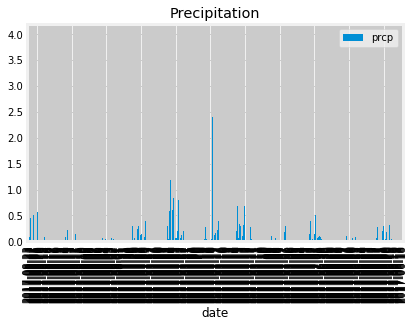

In [17]:
df2.plot.bar(title='Precipitation')
#ax.tick_params(top='off', bottom='off', left='off', right='off', labelleft='on', labelbottom='on')
plt.show()

In [18]:
# sum stats 
df2.describe()

,prcp
count,329.000000
mean,0.105137
std,0.296032
min,0.000000
25%,0.000000
50%,0.020000
75%,0.100000
max,4.000000


In [19]:
# how many stations?

names = 0
for row in session.query(Measurement.station).distinct(): 
    print(row)
    names += 1 
    
    

('USC00519397',)
('USC00513117',)
('USC00514830',)
('USC00517948',)
('USC00518838',)
('USC00519523',)
('USC00519281',)
('USC00511918',)
('USC00516128',)


In [20]:
# how many unique stations
names 

9

In [21]:
# Most active stations listed in descending order

session.query(Measurement.station, func.count(Measurement.station)).group_by(Measurement.station).\
    order_by(func.count(Measurement.prcp).desc()).all()



[('USC00519281', 2772),
 ('USC00513117', 2709),
 ('USC00519397', 2724),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [22]:
# Low High And Average 
                         
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()

[(54.0, 85.0, 71.66378066378067)]

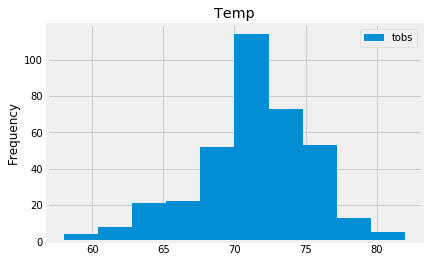

In [23]:
# Stations with most observations 

results3 = session.query(Measurement.tobs).\
    filter(Measurement.station == 'USC00519281').limit(365)

df3 = pd.DataFrame(results3, columns=['tobs',])
df3.head(10)
df3.plot.hist(title='Temp')

In [29]:
# Calc_Temps, Attempting some of the Bonus
def calc_temps(start_date, end_date):
#     """TMIN, TAVG, and TMAX for a list of dates.
    
#     Args:
#         start_date (string): A date string in the format %Y-%m-%d
#         end_date (string): A date string in the format %Y-%m-%d
        
#     Returns:
#         TMIN, TAVE, and TMAX
#     """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))


[(62.0, 69.57142857142857, 74.0)]


In [30]:

def calc_temps(start_date, end_date):
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

results4 = (calc_temps('2010-01-01', '2011-02-06'))


In [26]:
# Trying to plot

axis = []
mini = []
maxi = [] 

for stuff in results4:
    axis.append(session.query(func.avg(Measurement.tobs)))
    mini.append(session.query(func.min(Measurement.tobs)))
    maxi.append(session.query(func.max(Measurement.tobs)))



In [27]:
df4 = pd.DataFrame(results4, columns=['mini', 'axis', 'maxi'])
df4

,mini,axis,maxi
0,56.0,72.063373,87.0


In [28]:
x=0
df4.plot.bar( ,'axis', title='Trp Avg Temp')

SyntaxError: invalid syntax (<ipython-input-28-b0aad1f6afc6>, line 2)